In [69]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
from numpy import random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

In [70]:
df = pd.read_csv('../dataset/titanic3.csv',encoding='euc-kr')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [95]:
# 과제(2): 타이타닉 age, pclass, fare, sex, embarked 중 2개를 선택해
# 각 칼럼 특징을 설명하고 종속변수 survived와의 관계를 서술
# 전처리 후 기초통계량, 시각화를 통한 분포 및 특징 탐색, 이상치 여부 탐색
# 선택한 컬럼을 잘 활용할 수 있는 형태로 변환

In [72]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [73]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [93]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.377758,0.060832,0.018322,-0.558477,-0.034642
survived,-0.312469,1.000000,-0.066598,-0.027825,0.082660,0.244208,NaN
age,-0.377758,-0.066598,1.000000,-0.220725,-0.138440,0.169963,0.058978
sibsp,0.060832,-0.027825,-0.220725,1.000000,0.373587,0.160224,-0.099961
parch,0.018322,0.082660,-0.138440,0.373587,1.000000,0.221522,0.051099
fare,-0.558477,0.244208,0.169963,0.160224,0.221522,1.000000,-0.042665
body,-0.034642,NaN,0.058978,-0.099961,0.051099,-0.042665,1.000000


#### fare
- 평균(33.295479)과 중앙값(14.454200)의 차이가 큰 편
    - 특히 max값이 512.329200로 평균과 차이가 많이 나는 것을 볼 수 있음
    - 박스 플랏을 보면 upper whisker가 아주 많은 것을 볼 수 있음
- 왼쪽으로 극적으로 치우친 그래프
- 이상치 범위: 66.34 ~
    - lower whisker는 없음/ upper whisker만 171개

#### age
- 평균(29.892983)과 중앙값(30)이 큰 차이가 없음
- 최소, 최댓값을 고려하면 왼쪽으로 다소 치우친 그래프임을 알 수 있음
- 이상치 범위: ~ 0.44 / 57.34 ~
    - 최고령자가 80이라는 걸 생각하면 이상치가 생각보다 많이 나옴
- 주로 20~40대에 사람들이 많이 몰렸다는 걸 볼 수 있음 (상대도수 그래프 참고)

In [75]:
#나이 nan처리
df['age'].replace(np.nan, 1000, inplace=True)
ix = df['age']!=1000
ix2 = df['age']==1000
ix3 = df['sex']=='female'
ix4 = df['sex']=='male'

idx1 = df['name'].str.contains('Miss. ')   #미혼 여성
idx2 = df['name'].str.contains('Mrs. ')    #기혼 여성
idx3 = df['name'].str.contains('Dr. ')     #의사
idx4 = df['name'].str.contains('Master. ') #남자
idx6 = df['name'].str.contains('Mr. ')     #남자
idx7 = df['name'].str.contains('Ms. ')     #여자

miss = df['age'][idx1&ix].mean()
mrs = df['age'][idx2&ix].mean()
dr1 = df['age'][idx3&ix&ix3].mean()
dr2 = df['age'][idx3&ix&ix4].mean()
master = df['age'][idx4&ix].mean()
mr = df['age'][idx6&ix].mean()
ms = df['age'][idx7&ix].mean()

df['age'][idx1&ix2] = miss
df['age'][idx2&ix2] = mrs
df['age'][idx3&ix2&ix3] = dr1
df['age'][idx3&ix2&ix4] = dr2
df['age'][idx4&ix2] = master
df['age'][idx6&ix2] = mr
df['age'][idx7&ix2] = ms

#요금 nan처리
df.fare.replace(np.nan, df['fare'].mean(), inplace=True)

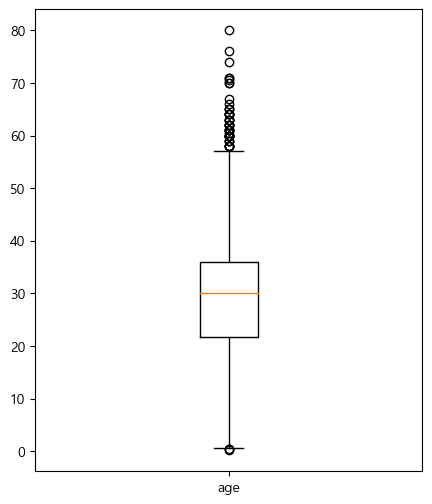

In [76]:
plt.figure(figsize=(5,6))
plt.boxplot(df.age, labels=['age'])
plt.show()

In [77]:
#이상치 탐색 방법 2가지
q1 = np.percentile(df.age,25)
q3 = np.percentile(df.age,75)
iqr15 = (q3-q1)*1.5
abv = df[(df['age'] <= q1-iqr15) | (df['age'] >= q3+iqr15)]

q1 = df.age.describe()['25%']
q3 = df.age.describe()['75%']
iqr = q3 - q1
abv = df[(df['age'] <= q1-(iqr*1.5)) | (df['age'] >= q3+(iqr*1.5))]

print(f"이상치: ~{(q1-(iqr*1.5)).round(2)} / {(q3+(iqr*1.5)).round(2)}~")
len(abv)
# 단, 이상치 개수가 많은 편이고, 부적절한 데이터라 생각될 정도의 이상치도 아니므로
# 삭제 처리는 하지 않음
# 그냥 타이타닉 평균 나이대~ 등을 파악할 때 참고하는 정도

이상치: ~0.44 / 57.34~


52

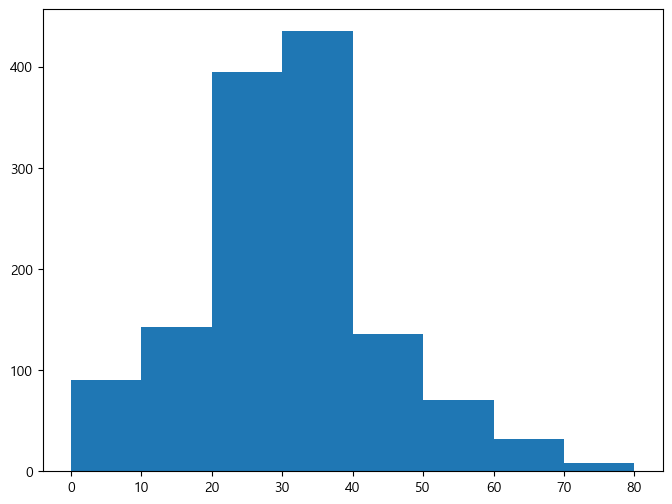

In [78]:
plt.figure(figsize=(8,6))
freq, _, _ = plt.hist(df.age, bins=8, range=(0,80))

freq, _ = np.histogram(df.age, bins=8, range=(0,80))   #각 구간 값 개수count

In [79]:
dfage = pd.DataFrame()
dfage['calss_v'] = [(i+(i+10))//2 for i in range(0,80,10)]   #계급값

freq, _ = np.histogram(df.age, bins=8, range=(0,80))   #각 구간 값 개수count
dfage['frequency'] = freq   #각 계급별 빈도수(개수)

dfage['rel_freq'] = freq/freq.sum()    #상대도수(해당 계급 데이터의 상대적인 비율)
dfage['cum_freq'] = np.cumsum(dfage.rel_freq)   # 누적 상대도수

dfage

,calss_v,frequency,rel_freq,cum_freq
0,5,90,0.068755,0.068755
1,15,143,0.109244,0.177998
2,25,395,0.301757,0.479756
3,35,435,0.332315,0.812070
4,45,136,0.103896,0.915966
5,55,70,0.053476,0.969442
6,65,32,0.024446,0.993888
7,75,8,0.006112,1.000000


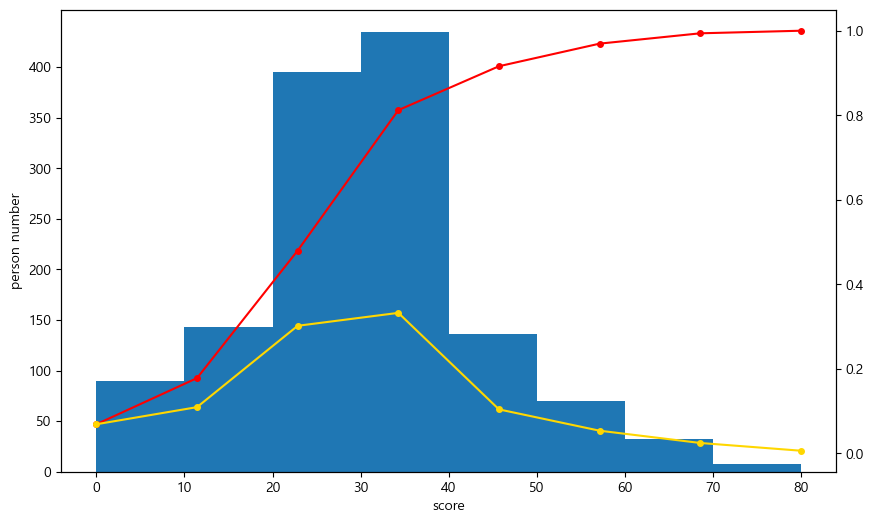

In [80]:
plt.figure(figsize=(10,6))

freq, _, _ = plt.hist(df.age, bins=8, range=(0,80))
plt.xlabel('score')
plt.ylabel('person number')
plt.xticks(np.linspace(0, 80, 8+1))
plt.yticks(np.arange(0, freq.max()+1, 50))

ax2=plt.twinx()
x=np.linspace(0, 80, 8)
y=dfage['cum_freq']
ax2.plot(x,y, color='red', marker='o', markersize=4)    #누적상대도수

plt.plot(x, dfage.rel_freq, color='gold', marker='o', markersize=4)   #상대도수

plt.show()

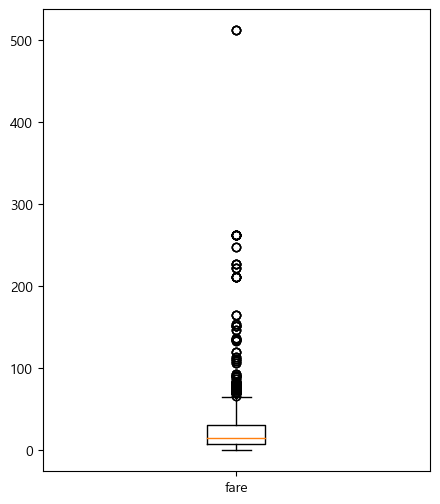

In [81]:
plt.figure(figsize=(5,6))
plt.boxplot(df.fare, labels=['fare'])
plt.show()

In [82]:
#이상치 탐색
q1 = np.percentile(df.fare,25)
q3 = np.percentile(df.fare,75)
iqr15 = (q3-q1)*1.5
abv = df[(df['fare'] <= q1-iqr) | (df['fare'] >= q3+iqr)]

print(f"이상치: ~{(q1-(iqr*1.5)).round(2)} / {(q3+(iqr*1.5)).round(2)}~")
len(abv)
# 이상치가 아주 많음
# 특히 upper whisker 범위가 너무 넓음

이상치: ~-13.44 / 52.61~


255

In [107]:
df.fare.describe()

count    1309.000000
mean       33.295479
std        51.738879
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

<AxesSubplot:ylabel='Frequency'>

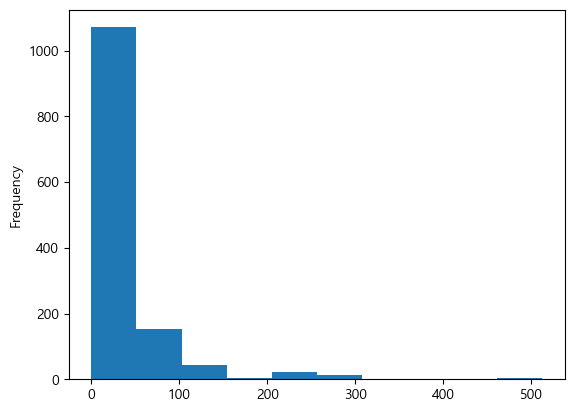

In [108]:
df.fare.plot(kind='hist')

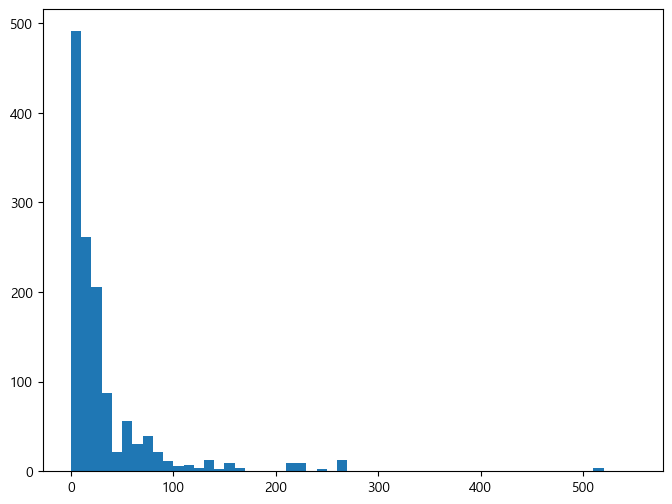

In [83]:
plt.figure(figsize=(8,6))
freq, _, _ = plt.hist(df.fare, bins=55, range=(0,550))

freq, _ = np.histogram(df.fare, bins=11, range=(0,550))   #각 구간 값 개수count

In [84]:
dfare = pd.DataFrame()
dfare['calss_v'] = [(i+25) for i in range(0,550,50)]   #계급값

freq, _ = np.histogram(df.fare, bins=11, range=(0,550))   #각 구간 값 개수count
dfare['frequency'] = freq   #각 계급별 빈도수(개수)

dfare['rel_freq'] = freq/freq.sum()    #상대도수(해당 계급 데이터의 상대적인 비율)
dfare['cum_freq'] = np.cumsum(dfare.rel_freq)   # 누적 상대도수

dfare

,calss_v,frequency,rel_freq,cum_freq
0,25,1067,0.815126,0.815126
1,75,158,0.120703,0.935829
2,125,33,0.025210,0.961039
3,175,13,0.009931,0.970970
4,225,21,0.016043,0.987013
5,275,13,0.009931,0.996944
6,325,0,0.000000,0.996944
7,375,0,0.000000,0.996944
8,425,0,0.000000,0.996944
9,475,0,0.000000,0.996944


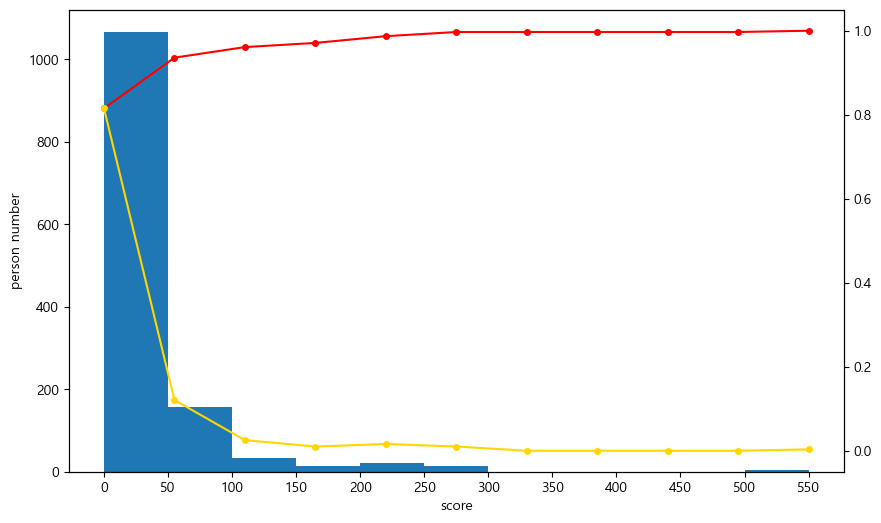

In [85]:
plt.figure(figsize=(10,6))

freq, _, _ = plt.hist(df.fare, bins=11, range=(0,550))
plt.xlabel('score')
plt.ylabel('person number')
plt.xticks(np.linspace(0, 550, 11+1))
plt.yticks(np.arange(0, freq.max()+1, 200))

ax2=plt.twinx()
x=np.linspace(0, 550, 11)
y=dfare['cum_freq']
ax2.plot(x,y, color='red', marker='o', markersize=4)    #누적상대도수

plt.plot(x, dfare.rel_freq, color='gold', marker='o', markersize=4)   #상대도수

plt.show()

# 초반에 극히 치우친 데이터

In [98]:
# 과제(3): 타이타닉에서 2개 선택, 공분산 행렬 및 상관계수 행렬 탐색
pclass = np.array(df['pclass'])
fare = np.array(df['fare'])
survived = np.array(df['survived'])

tt = pd.DataFrame({'pclass':pclass, 'fare':fare, 'survived':survived})
tt.head()

,pclass,fare,survived
0,1,211.3375,1
1,1,151.5500,1
2,1,151.5500,0
3,1,151.5500,0
4,1,151.5500,0


In [99]:
tdf = tt.copy()

tdf['pclass_deviation'] = tdf.pclass - tdf.pclass.mean()
tdf['fare_deviation'] = tdf.fare - tdf.fare.mean()
tdf['survived_deviation'] = tdf.survived - tdf.survived.mean()

tdf['pclass: pod'] = tdf['pclass_deviation']*tdf['survived_deviation']
tdf['fare: pod'] = tdf['fare_deviation']*tdf['survived_deviation']
#두 편차를 곱한 값 -> 공분산

tdf.head()

,pclass,fare,survived,pclass_deviation,fare_deviation,survived_deviation,pclass: pod,fare: pod
0,1,211.3375,1,-1.294882,178.042021,0.618029,-0.800274,110.035137
1,1,151.5500,1,-1.294882,118.254521,0.618029,-0.800274,73.084727
2,1,151.5500,0,-1.294882,118.254521,-0.381971,0.494607,-45.169794
3,1,151.5500,0,-1.294882,118.254521,-0.381971,0.494607,-45.169794
4,1,151.5500,0,-1.294882,118.254521,-0.381971,0.494607,-45.169794


In [106]:
tdf['pclass: pod'].mean()
tdf['fare: pod'].mean()

6.136632665643437

In [101]:
print(np.cov(pclass, survived, ddof=1))
np.cov(fare, survived, ddof=1)

[[ 0.70196919 -0.12724831]
 [-0.12724831  0.23624963]]


array([[2.67691160e+03, 6.14132428e+00],
       [6.14132428e+00, 2.36249629e-01]])

In [102]:
np.cov(pclass, survived, ddof=0)[0,1] / (np.std(pclass) * np.std(survived))
np.cov(fare, survived, ddof=0)[0,1] / (np.std(fare) * np.std(survived))

0.24420775279437396

In [103]:
np.corrcoef(pclass, survived)
np.corrcoef(fare, survived)

array([[1.        , 0.24420775],
       [0.24420775, 1.        ]])

In [104]:
tdf[['pclass','fare','survived']].corr()

,pclass,fare,survived
pclass,1.000000,-0.558477,-0.312469
fare,-0.558477,1.000000,0.244208
survived,-0.312469,0.244208,1.000000
